In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
import math

from sklearn import datasets, ensemble, metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models import HoverTool
from bokeh.models import Scatter
from bokeh.transform import factor_cmap
from bokeh.palettes import Turbo256
from bokeh.models import Legend
from bokeh.models import BoxAnnotation
from bokeh.models import Label, LabelSet

warnings.filterwarnings('ignore')

In [ ]:
output_notebook()

In [ ]:
df = pd.read_csv('compas_dataset.csv')
df

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6167,0,0,1,0,1,1,0,0,0,0,0,0
6168,0,0,0,0,1,1,0,0,0,0,0,0
6169,0,0,0,1,0,0,0,0,0,1,0,0
6170,0,3,0,0,0,1,0,0,0,0,1,1


In [ ]:
X = df.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
X

,Number_of_Priors,Misdemeanor
0,0,0
1,0,0
2,4,0
3,0,1
4,14,0
...,...,...
6167,0,0
6168,0,0
6169,0,0
6170,3,1


In [ ]:
Y = df['Two_yr_Recidivism']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)

In [ ]:
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

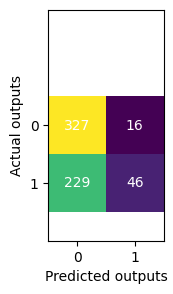

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
data = {'FPR': [FPR],
        'TPR': [TPR],
        'group': ['All'],
        'distance': [0]}
points = pd.DataFrame(data)
data2 = {'FPR': [FPR],
        'TPR': [TPR],
        'group': ['All'],
        'distance': [0]}
points2 = pd.DataFrame(data2)

In [ ]:
afam = df[df['African_American'] == 1]
afam

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
8,1,3,1,0,1,1,0,0,0,0,0,1
10,0,0,0,0,0,1,0,0,0,0,0,0
12,1,7,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,0,0,0,0,1,0,0,0,0,0,1
6166,0,0,1,0,1,1,0,0,0,0,0,0
6167,0,0,1,0,1,1,0,0,0,0,0,0
6168,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
X = afam.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = afam['Two_yr_Recidivism']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

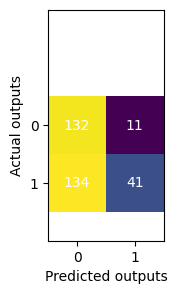

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'African Americans', Dist]

In [ ]:
natam = df[df['Native_American'] == 1 ]
natam

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
646,0,3,1,0,0,0,0,0,1,0,0,1
987,0,7,1,0,0,0,0,0,1,0,0,0
999,0,0,0,0,0,0,0,0,1,0,0,1
1256,0,2,0,0,0,0,0,0,1,0,0,0
1665,0,0,0,0,0,0,0,0,1,0,0,0
1812,1,15,1,1,0,0,0,0,1,0,1,0
3951,0,2,1,0,0,0,0,0,1,0,0,1
4126,1,0,1,0,1,0,0,0,1,0,0,1
5033,1,1,1,0,1,0,0,0,1,0,0,0
5260,1,22,1,1,0,0,0,0,1,0,0,0


In [ ]:
X = natam.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = natam['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

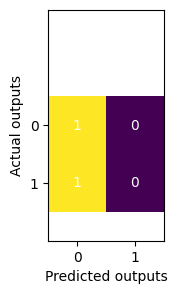

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Native Americans', Dist]

In [ ]:
other = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0)]
other

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
5,0,3,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6151,0,0,0,0,0,0,0,0,0,0,0,0
6153,1,2,0,0,0,0,0,0,0,0,1,1
6158,0,0,1,0,1,0,0,0,0,0,0,0
6164,1,0,1,0,1,0,0,0,0,0,0,1


In [ ]:
X = other.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = other['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

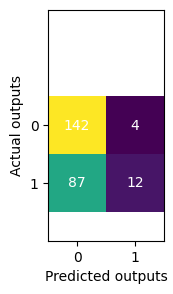

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Whites', Dist]

In [ ]:
young = df[df['Age_Below_TwentyFive'] == 1 ]
young

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
2,1,4,0,0,1,1,0,0,0,0,0,0
8,1,3,1,0,1,1,0,0,0,0,0,1
18,1,1,1,0,1,1,0,0,0,0,0,0
20,0,0,0,0,1,0,0,0,0,0,1,0
21,1,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6164,1,0,1,0,1,0,0,0,0,0,0,1
6166,0,0,1,0,1,1,0,0,0,0,0,0
6167,0,0,1,0,1,1,0,0,0,0,0,0
6168,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
X = young.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = young['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

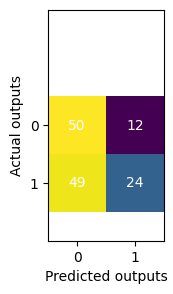

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Young', Dist]

In [ ]:
middle = df[(df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 0)]
middle

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
1,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
5,0,3,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6161,0,0,0,0,0,0,0,1,0,0,0,0
6162,0,0,0,0,0,0,0,1,0,0,0,0
6163,0,2,0,0,0,1,0,0,0,0,0,1
6165,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = middle.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = middle['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

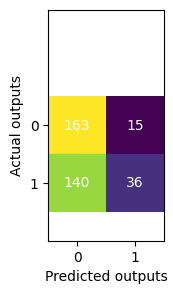

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Middle aged', Dist]

In [ ]:
old = df[df['Age_Above_FourtyFive'] == 1]
old

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
11,1,1,0,1,0,0,0,0,0,0,1,0
17,1,13,1,1,0,1,0,0,0,0,0,0
29,0,0,0,1,0,0,0,0,0,0,0,0
30,1,7,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6140,0,1,0,1,0,0,0,0,0,0,1,1
6141,1,7,1,1,0,1,0,0,0,0,0,1
6142,0,2,1,1,0,0,0,0,0,0,1,0
6147,1,14,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = old.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = old['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

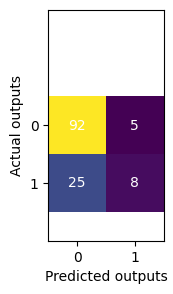

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Old', Dist]

In [ ]:
female = df[df['Female'] == 1]
female

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
6,0,0,0,0,0,0,0,0,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,1,1
11,1,1,0,1,0,0,0,0,0,0,1,0
20,0,0,0,0,1,0,0,0,0,0,1,0
31,1,4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6144,1,4,1,0,0,0,0,0,0,0,1,1
6153,1,2,0,0,0,0,0,0,0,0,1,1
6159,1,0,1,0,1,1,0,0,0,0,1,1
6170,0,3,0,0,0,1,0,0,0,0,1,1


In [ ]:
X = female.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = female['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

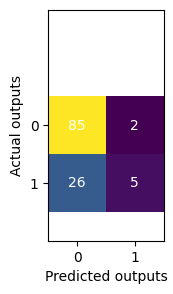

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Females', Dist]

In [ ]:
male = df[df['Female'] == 0]
male

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,0,0,0,0,1,0,0,0,0,0,1
6166,0,0,1,0,1,1,0,0,0,0,0,0
6167,0,0,1,0,1,1,0,0,0,0,0,0
6168,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
X = male.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = male['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

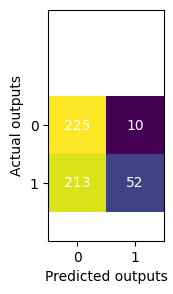

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points.loc[len(points.index)] = [FPR, TPR, 'Males', Dist]

In [ ]:
af_yo_fe = df[(df['African_American'] == 1) & (df['Age_Below_TwentyFive'] == 1) & (df['Female'] == 1)]
af_yo_fe

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
35,0,2,1,0,1,1,0,0,0,0,1,0
113,0,0,0,0,1,1,0,0,0,0,1,1
120,0,1,1,0,1,1,0,0,0,0,1,0
128,0,0,1,0,1,1,0,0,0,0,1,0
167,0,1,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6052,1,0,0,0,1,1,0,0,0,0,1,0
6065,1,1,0,0,1,1,0,0,0,0,1,0
6090,0,0,0,0,1,1,0,0,0,0,1,0
6143,1,0,1,0,1,1,0,0,0,0,1,0


In [ ]:
X = af_yo_fe.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = af_yo_fe['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

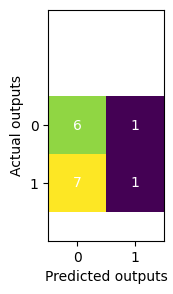

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Young African American females', Dist]

In [ ]:
af_yo_ma = df[(df['African_American'] == 1) & (df['Age_Below_TwentyFive'] == 1) & (df['Female'] == 0)]
af_yo_ma

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
2,1,4,0,0,1,1,0,0,0,0,0,0
8,1,3,1,0,1,1,0,0,0,0,0,1
18,1,1,1,0,1,1,0,0,0,0,0,0
47,1,2,0,0,1,1,0,0,0,0,0,0
54,1,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6133,1,0,1,0,1,1,0,0,0,0,0,0
6150,1,2,0,0,1,1,0,0,0,0,0,1
6166,0,0,1,0,1,1,0,0,0,0,0,0
6167,0,0,1,0,1,1,0,0,0,0,0,0


In [ ]:
X = af_yo_ma.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = af_yo_ma['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

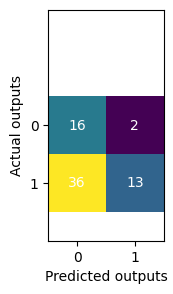

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Young African American males', Dist]

In [ ]:
af_mid_fe = df[(df['African_American'] == 1) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 0) & (df['Female'] == 1)]
af_mid_fe

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
68,1,1,0,0,0,1,0,0,0,0,1,0
76,0,1,0,0,0,1,0,0,0,0,1,1
125,1,0,0,0,0,1,0,0,0,0,1,0
126,1,7,1,0,0,1,0,0,0,0,1,0
133,1,4,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6089,1,6,1,0,0,1,0,0,0,0,1,1
6100,1,1,1,0,0,1,0,0,0,0,1,0
6101,1,4,1,0,0,1,0,0,0,0,1,0
6105,1,9,1,0,0,1,0,0,0,0,1,0


In [ ]:
X = af_mid_fe.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = af_mid_fe['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

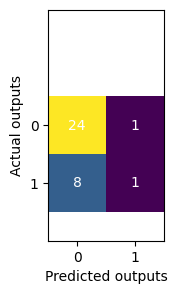

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Middle aged African American females', Dist]

In [ ]:
af_mid_ma = df[(df['African_American'] == 1) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 0) & (df['Female'] == 0)]
af_mid_ma

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
1,1,0,0,0,0,1,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,0,0
12,1,7,0,0,0,1,0,0,0,0,0,0
14,0,3,1,0,0,1,0,0,0,0,0,0
24,1,8,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6156,0,1,0,0,0,1,0,0,0,0,0,0
6157,0,4,1,0,0,1,0,0,0,0,0,0
6160,1,19,1,0,0,1,0,0,0,0,0,0
6163,0,2,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = af_mid_ma.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = af_mid_ma['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

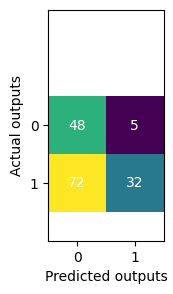

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Middle aged African American males', Dist]

In [ ]:
af_old_fe = df[(df['African_American'] == 1) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 1) & (df['Female'] == 1)]
af_old_fe

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
38,0,7,0,1,0,1,0,0,0,0,1,0
59,0,0,0,1,0,1,0,0,0,0,1,1
130,1,1,0,1,0,1,0,0,0,0,1,0
227,0,0,0,1,0,1,0,0,0,0,1,0
229,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5704,1,25,1,1,0,1,0,0,0,0,1,0
5857,0,3,0,1,0,1,0,0,0,0,1,1
5984,0,0,0,1,0,1,0,0,0,0,1,0
5986,0,4,1,1,0,1,0,0,0,0,1,1


In [ ]:
X = af_old_fe.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = af_old_fe['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

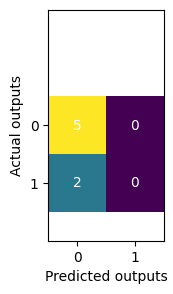

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Old African American females', Dist]

In [ ]:
af_old_ma = df[(df['African_American'] == 1) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 1) & (df['Female'] == 0)]
af_old_ma

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
17,1,13,1,1,0,1,0,0,0,0,0,0
36,0,2,0,1,0,1,0,0,0,0,0,1
49,0,4,0,1,0,1,0,0,0,0,0,1
147,0,8,0,1,0,1,0,0,0,0,0,0
156,1,23,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6092,0,0,0,1,0,1,0,0,0,0,0,1
6102,0,4,1,1,0,1,0,0,0,0,0,0
6122,0,5,1,1,0,1,0,0,0,0,0,1
6135,1,4,1,1,0,1,0,0,0,0,0,1


In [ ]:
X = af_old_ma.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = af_old_ma['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

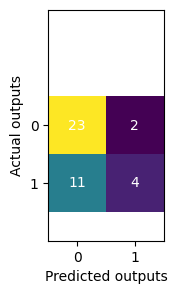

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Old African Americans males', Dist]

In [ ]:
ot_yo_fe = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0) & (df['Age_Below_TwentyFive'] == 1) & (df['Age_Above_FourtyFive'] == 0) & (df['Female'] == 1)]
ot_yo_fe

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
20,0,0,0,0,1,0,0,0,0,0,1,0
81,0,0,1,0,1,0,0,0,0,0,1,0
217,1,5,1,0,1,0,0,0,0,0,1,0
234,0,1,0,0,1,0,0,0,0,0,1,0
293,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5716,1,0,1,0,1,0,0,0,0,0,1,0
5937,0,1,1,0,1,0,0,0,0,0,1,1
5950,1,0,1,0,1,0,0,0,0,0,1,1
6096,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
X = ot_yo_fe.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = ot_yo_fe['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

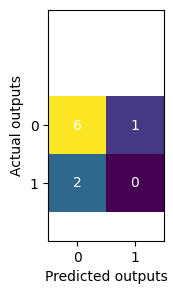

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Young white females', Dist]

In [ ]:
ot_yo_ma = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0) & (df['Age_Below_TwentyFive'] == 1) & (df['Age_Above_FourtyFive'] == 0) & (df['Female'] == 0)]
ot_yo_ma

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
32,1,1,0,0,1,0,0,0,0,0,0,1
67,0,0,1,0,1,0,0,0,0,0,0,0
74,1,0,1,0,1,0,0,0,0,1,0,0
79,1,1,1,0,1,0,0,0,0,1,0,0
88,1,8,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,0,0,1,0,1,0,0,0,0,0,0,1
5989,0,0,0,0,1,0,0,0,0,1,0,0
6011,0,0,0,0,1,0,0,0,0,1,0,0
6158,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
X = ot_yo_ma.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = ot_yo_ma['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

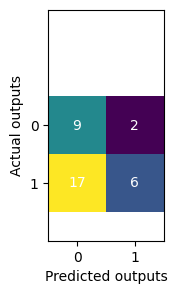

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Young white males', Dist]

In [ ]:
ot_mid_fe = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 0) & (df['Female'] == 1)]
ot_mid_fe

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
6,0,0,0,0,0,0,0,0,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,1,1
31,1,4,1,0,0,0,0,0,0,0,1,1
45,0,0,0,0,0,0,0,0,0,1,1,0
87,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6088,0,0,0,0,0,0,0,0,0,0,1,1
6095,0,1,0,0,0,0,0,0,0,1,1,1
6109,0,3,1,0,0,0,0,0,0,0,1,0
6144,1,4,1,0,0,0,0,0,0,0,1,1


In [ ]:
X = ot_mid_fe.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = ot_mid_fe['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

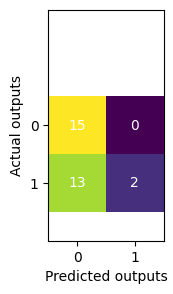

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Middle aged white females', Dist]

In [ ]:
ot_mid_ma = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 0) & (df['Female'] == 0)]
ot_mid_ma

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
5,0,3,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
15,1,6,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6130,0,2,1,0,0,0,0,0,0,0,0,1
6131,1,0,0,0,0,0,0,0,0,0,0,1
6145,0,5,0,0,0,0,0,0,0,0,0,0
6148,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = ot_mid_ma.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = ot_mid_ma['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

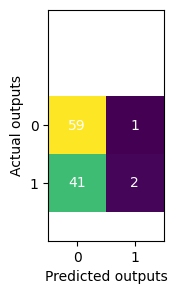

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Middle aged white males', Dist]

In [ ]:
ot_old_fe = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 1) & (df['Female'] == 1)]
ot_old_fe

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
11,1,1,0,1,0,0,0,0,0,0,1,0
83,0,0,0,1,0,0,0,0,0,0,1,1
183,1,0,0,1,0,0,0,0,0,0,1,1
266,0,0,0,1,0,0,0,0,0,0,1,1
301,0,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6049,1,7,1,1,0,0,0,0,0,0,1,0
6129,0,1,0,1,0,0,0,0,0,0,1,1
6139,0,3,0,1,0,0,0,0,0,0,1,0
6140,0,1,0,1,0,0,0,0,0,0,1,1


In [ ]:
X = ot_old_fe.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = ot_old_fe['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

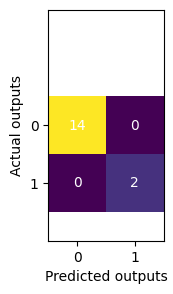

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Old white females', Dist]

In [ ]:
ot_old_ma = df[(df['African_American'] == 0) & (df['Asian'] == 0) & (df['Hispanic'] == 0) & (df['Native_American'] == 0) & (df['Age_Below_TwentyFive'] == 0) & (df['Age_Above_FourtyFive'] == 1) & (df['Female'] == 0)]
ot_old_ma

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
29,0,0,0,1,0,0,0,0,0,0,0,0
30,1,7,0,1,0,0,0,0,0,1,0,0
42,0,0,0,1,0,0,0,0,0,0,0,1
50,0,8,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0,8,0,1,0,0,0,0,0,0,0,1
6118,0,4,0,1,0,0,0,0,0,0,0,1
6136,1,0,0,1,0,0,0,0,0,0,0,1
6147,1,14,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = ot_old_ma.drop(['Two_yr_Recidivism', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female'], axis=1)
Y = ot_old_ma['Two_yr_Recidivism']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=400)
clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=400)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=400)

In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

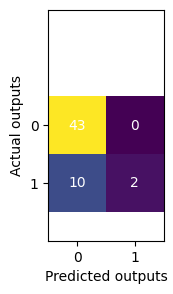

In [ ]:
y_pred_adj = adjusted_classes(y_scores, 0.70)
cm = confusion_matrix(Y_test, y_pred_adj)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -2)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
TPR = metrics.recall_score(Y_test, y_pred_adj)
Dist = round(math.dist([0.046647, 0.167273], [FPR, TPR]), 2)
points2.loc[len(points2.index)] = [FPR, TPR, 'Old white males', Dist]

In [ ]:
points

,FPR,TPR,group,distance
0,0.046647,0.167273,All,0.00
1,0.076923,0.234286,African Americans,0.07
2,0.000000,0.000000,Native Americans,0.17
3,0.027397,0.121212,Whites,0.05
4,0.193548,0.328767,Young,0.22
5,0.084270,0.204545,Middle aged,0.05
6,0.051546,0.242424,Old,0.08
7,0.022989,0.161290,Females,0.02
8,0.042553,0.196226,Males,0.03


In [ ]:
points2

,FPR,TPR,group,distance
0,0.046647,0.167273,All,0.00
1,0.142857,0.125000,Young African American females,0.11
2,0.111111,0.265306,Young African American males,0.12
3,0.040000,0.111111,Middle aged African American females,0.06
4,0.094340,0.307692,Middle aged African American males,0.15
5,0.000000,0.000000,Old African American females,0.17
6,0.080000,0.266667,Old African Americans males,0.10
7,0.142857,0.000000,Young white females,0.19
8,0.181818,0.260870,Young white males,0.16
9,0.000000,0.133333,Middle aged white females,0.06


In [ ]:
points.group.unique()
index_cmap = factor_cmap('group', palette=['red', 'blue', 'yellow', 'green', 'orange', 'pink',
                                           'purple', 'black', 'gray'], factors=sorted(points.group.unique()))

In [ ]:
points2.group.unique()
index_cmap2 = factor_cmap('group', palette=['blue', 'red', 'yellow', 'green', 'orange', 'pink',
                                           'purple', 'black', 'gray', 'brown', 'cyan', 'magenta',
                                           'olive'], factors=sorted(points2.group.unique()))

In [ ]:
source = ColumnDataSource({str(c): v.values for c, v in points.items()})

In [ ]:
fig = figure(height=670,
             width=903,
             x_axis_label='FPR',
             y_axis_label='TPR',
             x_range=(-0.1, 1.1), y_range=(-0.1, 1.1),
             title='Random forest with threshold 0.70',
             toolbar_location="below")

fig.scatter(x='FPR',
            y='TPR',
            source=points,
            color='royalblue',
            size=8,
            fill_color=index_cmap,
            legend_group='group')

#fig.line([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.4], [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.4])
fig.vspan(x=[0.046647], line_width=1, line_color="red", line_dash='dotted')
fig.hspan(y=[0.167273], line_width=1, line_color="red", line_dash='dotted')

NE = BoxAnnotation(top=1.4, bottom=0.167273, left=0.046647,
       right=1.4, fill_color="blue", fill_alpha=0.1)
SE = BoxAnnotation(top=0.167273, bottom=-0.2, left=0.046647,
       right=1.4, fill_color="red", fill_alpha=0.1)
SW = BoxAnnotation(top=0.167273, bottom=-0.2, left=-0.2,
       right=0.046647, fill_color="yellow", fill_alpha=0.1)
NW = BoxAnnotation(top=1.4, bottom=0.167273, left=-0.2,
       right=0.046647, fill_color="green", fill_alpha=0.1)

fig.add_layout(NE)
fig.add_layout(SE)
fig.add_layout(SW)
fig.add_layout(NW)

tooltips = [('Group','@group'), ('Distance to all', '@distance')]
hover_glyph = fig.circle(x='FPR', y='TPR', source=points,
                         size=15, alpha=0,
                         hover_fill_color='black', hover_alpha=0.5)
fig.add_tools(HoverTool(tooltips=tooltips, renderers=[hover_glyph]))

labels = LabelSet(x='FPR', y='TPR', text='group', level='glyph', source=source, text_font_size='8pt', x_offset=5, y_offset=5)
region1 = Label(x=650, y=540, x_units='screen', y_units='screen', text='NE', text_font_style='bold')
region2 = Label(x=650, y=10, x_units='screen', y_units='screen', text='SE', text_font_style='bold')
region3 = Label(x=10, y=10, x_units='screen', y_units='screen', text='SW', text_font_style='bold')
region4 = Label(x=10, y=540, x_units='screen', y_units='screen', text='NW', text_font_style='bold')
#fig.add_layout(labels)
fig.add_layout(region1)
fig.add_layout(region2)
fig.add_layout(region3)
fig.add_layout(region4)

fig.add_layout(fig.legend[0], 'right')

show(fig)

In [ ]:
fig = figure(height=670,
             width=1021,
             x_axis_label='FPR',
             y_axis_label='TPR',
             x_range=(-0.1, 1.1), y_range=(-0.1, 1.1),
             title='Random forest with threshold 0.70',
             toolbar_location="below")

fig.scatter(x='FPR',
            y='TPR',
            source=points2,
            color='royalblue',
            size=8,
            fill_color=index_cmap2,
            legend_group='group')

#fig.line([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.4], [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.4])
fig.vspan(x=[0.046647], line_width=1, line_color="red", line_dash='dotted')
fig.hspan(y=[0.167273], line_width=1, line_color="red", line_dash='dotted')

NE = BoxAnnotation(top=1.4, bottom=0.167273, left=0.046647,
       right=1.4, fill_color="blue", fill_alpha=0.1)
SE = BoxAnnotation(top=0.167273, bottom=-0.2, left=0.046647,
       right=1.4, fill_color="red", fill_alpha=0.1)
SW = BoxAnnotation(top=0.167273, bottom=-0.2, left=-0.2,
       right=0.046647, fill_color="yellow", fill_alpha=0.1)
NW = BoxAnnotation(top=1.4, bottom=0.167273, left=-0.2,
       right=0.046647, fill_color="green", fill_alpha=0.1)

fig.add_layout(NE)
fig.add_layout(SE)
fig.add_layout(SW)
fig.add_layout(NW)

tooltips = [('Group','@group'), ('Distance to all', '@distance')]
hover_glyph = fig.circle(x='FPR', y='TPR', source=points2,
                         size=15, alpha=0,
                         hover_fill_color='black', hover_alpha=0.5)
fig.add_tools(HoverTool(tooltips=tooltips, renderers=[hover_glyph]))

labels = LabelSet(x='FPR', y='TPR', text='group', level='glyph', source=source, text_font_size='8pt', x_offset=5, y_offset=5)
region1 = Label(x=650, y=540, x_units='screen', y_units='screen', text='NE', text_font_style='bold')
region2 = Label(x=650, y=10, x_units='screen', y_units='screen', text='SE', text_font_style='bold')
region3 = Label(x=10, y=10, x_units='screen', y_units='screen', text='SW', text_font_style='bold')
region4 = Label(x=10, y=540, x_units='screen', y_units='screen', text='NW', text_font_style='bold')
#fig.add_layout(labels)
fig.add_layout(region1)
fig.add_layout(region2)
fig.add_layout(region3)
fig.add_layout(region4)

fig.add_layout(fig.legend[0], 'right')

show(fig)